https://www.tensorflow.org/tutorials/keras/basic_classification

https://github.com/Zackory/Keras-MNIST-GAN/blob/master/mnist_gan.py


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers.advanced_activations import LeakyReLU

Using TensorFlow backend.


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(tr_im,tr_lab),(tt_im,tt_lab) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [5]:
tr_im.shape

(60000, 28, 28)

In [6]:
tr_lab

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

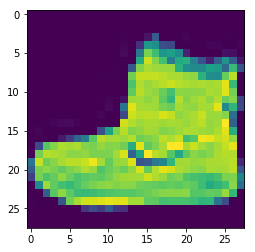

In [7]:
plt.imshow(tr_im[0,:,:])

In [8]:
npar = 100 #number of standard normal deviates to feed to generator input

In [9]:
tr_im.max()

255

In [10]:
tr_im = tr_im / tr_im.max()
tr_im = tr_im.reshape(tr_im.shape[0],784)

In [11]:
tt_im = tt_im / tt_im.max()
tt_im = tt_im.reshape(tt_im.shape[0],784)

In [12]:
opt = tf.train.AdamOptimizer(learning_rate=0.0002,beta1=0.5)

In [13]:
generator = keras.Sequential()
generator.add(keras.layers.Dense(256, input_dim=npar, activation=tf.nn.leaky_relu, kernel_initializer=keras.initializers.RandomNormal(stddev=0.02)))
generator.add(keras.layers.Dense(512, activation=tf.nn.leaky_relu))
generator.add(keras.layers.Dense(1024, activation=tf.nn.leaky_relu))
generator.add(keras.layers.Dense(784, activation=tf.nn.sigmoid))
generator.compile(loss='binary_crossentropy', optimizer=opt)

In [14]:
discriminator = keras.Sequential()
discriminator.add(keras.layers.Dense(1024, input_dim=784, kernel_initializer=keras.initializers.RandomNormal(stddev=0.02),activation=tf.nn.leaky_relu))
discriminator.add(keras.layers.Dropout(0.3))
discriminator.add(keras.layers.Dense(512, activation=tf.nn.leaky_relu))
discriminator.add(keras.layers.Dropout(0.3))
discriminator.add(keras.layers.Dense(256, activation=tf.nn.leaky_relu))
discriminator.add(keras.layers.Dropout(0.3))
discriminator.add(keras.layers.Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer=opt)

In [15]:
discriminator.trainable = False
gi = keras.layers.Input(shape=(npar,))
x = generator(gi)
go = discriminator(x)
gan = keras.Model(inputs=gi,outputs=go)
gan.compile(loss="binary_crossentropy",optimizer=opt)

In [16]:
def plot_gen():
    fig, axes = plt.subplots(nrows=1,ncols=10,figsize = (10,10))
    noise = np.random.randn(10,npar)
    vecs = generator.predict(noise).reshape(10,28,28)
    for ax,vec in zip(axes.flatten(),vecs):
        ax.imshow(vec)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
#plot_gen()

468


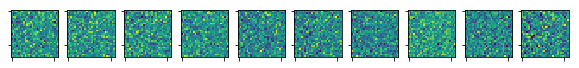

1 0.42777136 2.6199412


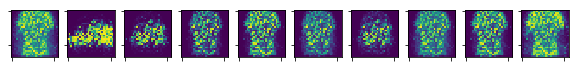

2 0.9826104 0.35459378


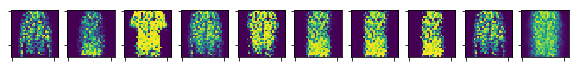

3 0.7384014 0.7643111


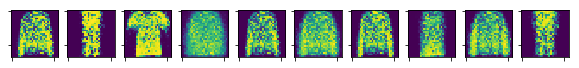

4 0.4982305 1.5935853


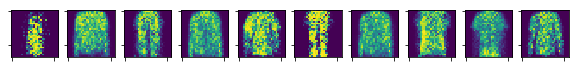

5 0.4919191 1.8560318


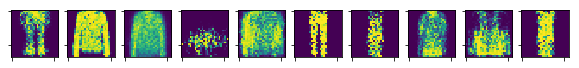

6 0.47634244 1.6865677


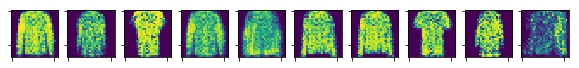

7 0.53069806 1.4851807


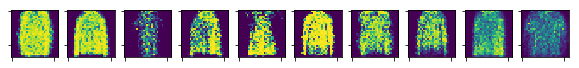

8 0.5402663 1.4630511


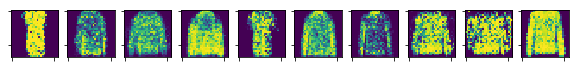

9 0.51061285 1.7415535


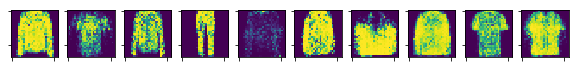

10 0.5818406 1.2182608


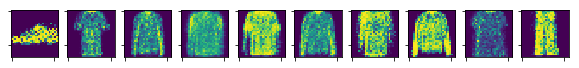

11 0.5787788 1.4471109


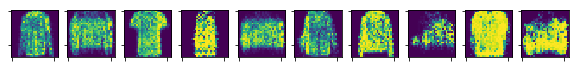

12 0.55162185 1.2833825


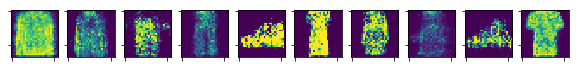

13 0.5929191 1.2046776


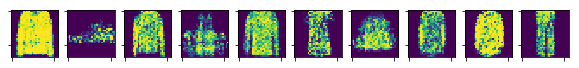

14 0.56974006 1.4121988


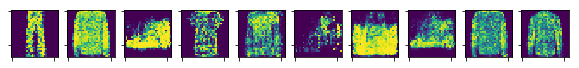

15 0.5601169 1.6731203


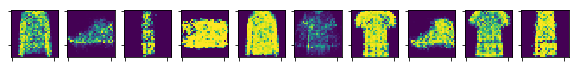

16 0.5511502 1.2282203


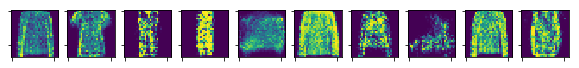

17 0.59464306 1.2531052


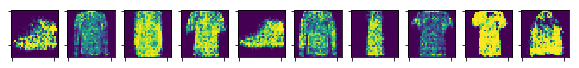

18 0.63351536 1.3721303


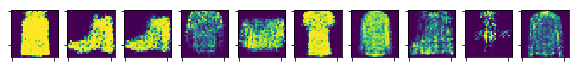

19 0.5805644 1.2690649


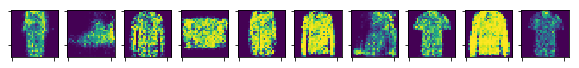

20 0.59806824 1.274873


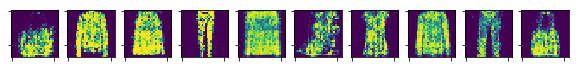

21 0.60635173 1.1704733


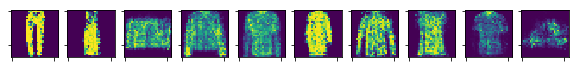

22 0.59269637 1.2272637


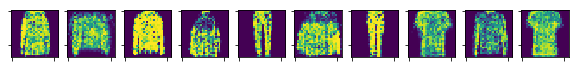

In [ ]:
batch_size = 128
batch_count = int(tr_im.shape[0] / batch_size)
print(batch_count)
plot_gen()
plt.show()
for e in range(1,200):
    for _ in range(batch_count):
        noise = np.random.randn(batch_size,npar)
        tr_im_batch = tr_im[np.random.randint(0,tr_im.shape[0],size=batch_size)]
        gen_im = generator.predict(noise)
        #print(gen_im.shape,tr_im_batch.shape)
        tr_im_batch = np.concatenate([tr_im_batch,gen_im])
        tr_im_lab = np.zeros(tr_im_batch.shape[0])
        tr_im_lab[:batch_size] = 0.9
        discriminator.trainable = True
        dloss = discriminator.train_on_batch(tr_im_batch,tr_im_lab)
        noise = np.random.randn(batch_size,npar)
        tr_img_lab = np.ones(batch_size)
        discriminator.trainable = False
        gloss = gan.train_on_batch(noise,tr_img_lab)
    print(e,dloss,gloss)
    plot_gen()
    plt.show()
        
    

In [69]:
predictions = model.predict(tt_im)

NameError: name 'model' is not defined

In [146]:
p_max = [np.argmax(p) for p in predictions]

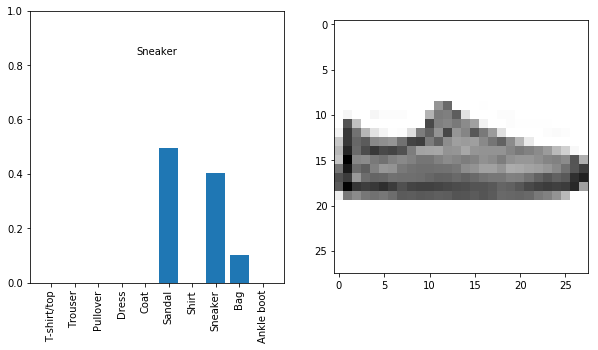

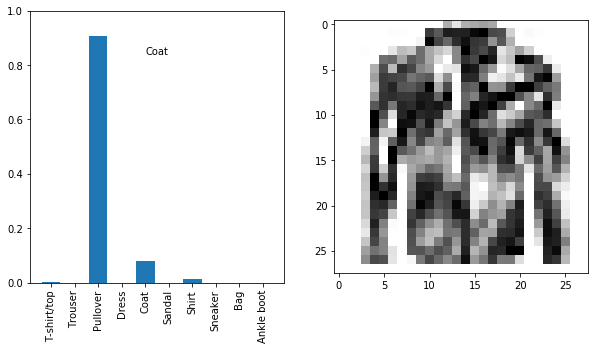

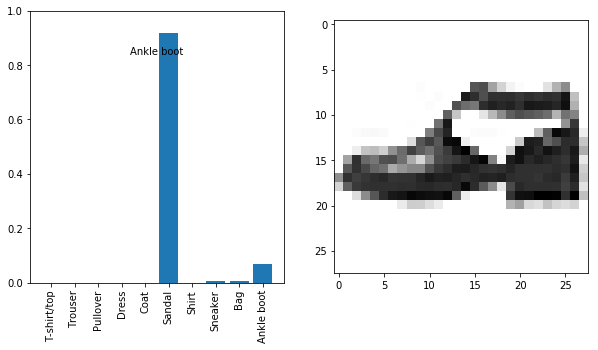

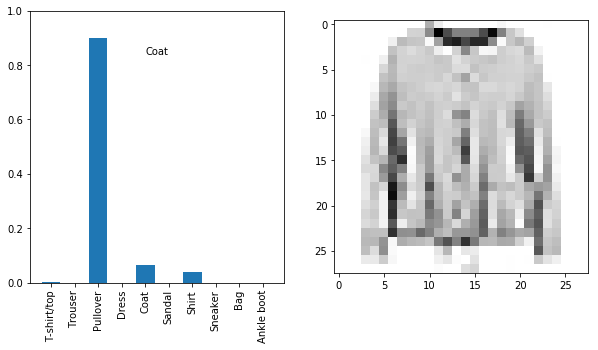

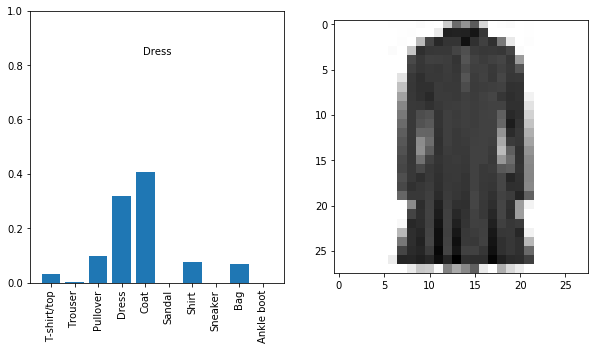

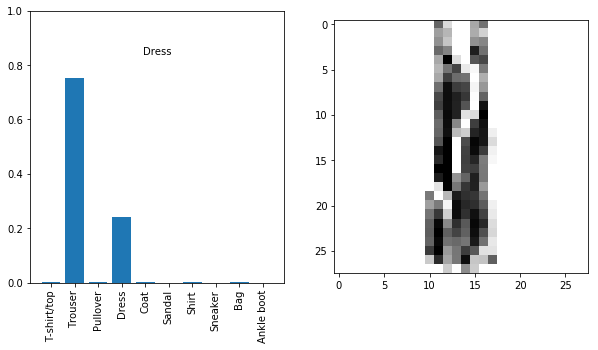

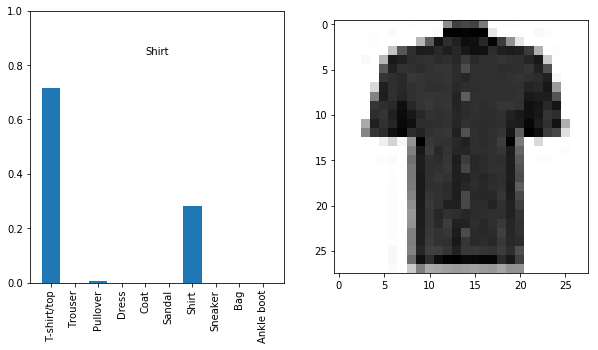

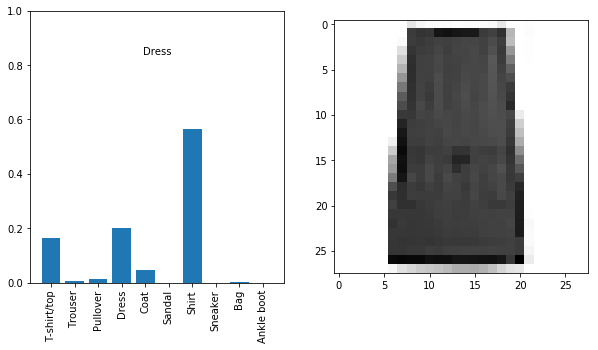

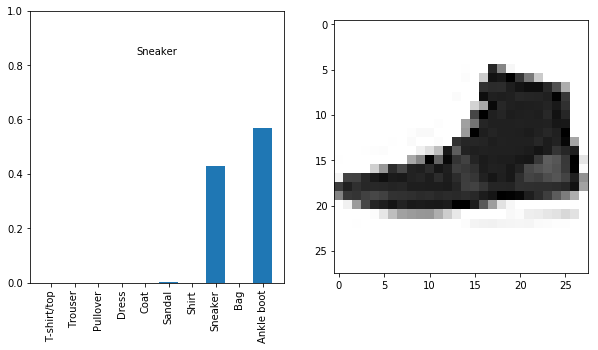

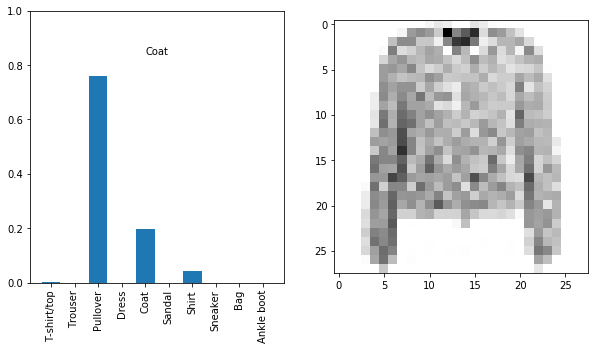

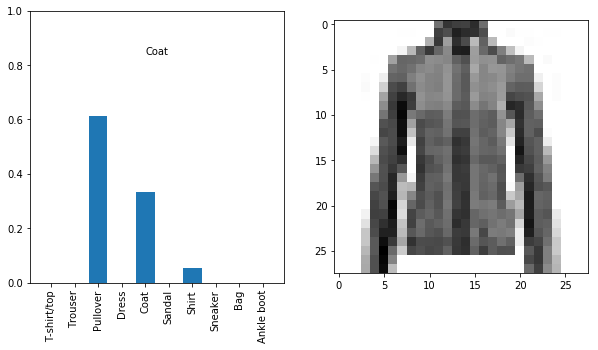

In [147]:
bins = np.arange(len(class_names))
wrong_count = 0
for p,pm,tl,ti in zip(predictions,p_max,tt_lab,tt_im): 
    if pm != tl:
        fig = plt.figure(figsize=(10,5))
        ax1,ax2 = plt.subplot(121),plt.subplot(122)
        ax1.bar(bins,p)
        ax1.set_xticks(bins)
        ax1.set_xticklabels(class_names,rotation=90)
        ax1.set_ylim(0,1)
        ax1.text(0.5,0.85,class_names[tl],transform=ax1.transAxes,ha="center",va="center")
        ax2.imshow(ti,cmap=plt.cm.gray_r)
        plt.show()
        wrong_count += 1
        if wrong_count > 10:
            break